In [1]:
import pandas, os, numpy as np
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage
from skimage import io, filters
from utils import utils # custom functions, in local environment
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## NN libs
import keras
from sklearn.decomposition import PCA
from keras.utils import to_categorical
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Conv3D, MaxPool2D, Dropout, Flatten

Using TensorFlow backend.


In [3]:
import data, config, tfidf, models
from utils import io

 Dataset :: namedtuple(
  'info': pandas.df
  'labels': pandas.df('filename.txt': 'genre')
  'genres': ['genre'] # unique genres
  'label_dataset': SubDataset
  'sentiment_dataset': SubDataset
  'book_sentiment_words_list': ['filename']

 SubDataset :: namedtuple(
   'dict_index_to_label' = dict to convert label_index -> label_name
   'dict_label_to_index'= dict to convert label_name -> label_index



In [4]:
# info = pandas.read_csv(config.dataset_dir + 'final_data.csv')
dataset = data.init_dataset()
dataset.info.keys()

Index(['title', 'filename', 'title.1', 'author', 'release year', 'genre',
       'pos score', 'neg score', 'neu score', 'comp score', 'amt pos',
       'amt neg'],
      dtype='object')

In [5]:
amt = 400
train = dataset.book_sentiment_words_list[:amt]
test = dataset.book_sentiment_words_list[amt:amt + amt]

In [6]:
x_train, y_train = data.extract_all(dataset, train)
x_test, y_test = data.extract_all(dataset, test)

In [7]:
dataset.labels

,1005.txt,1024.txt,1027.txt,103.txt,1051.txt,1056.txt,106.txt,1066-0.txt,1080.txt,1081.txt,...,9845-8.txt,9845.txt,9846-8.txt,9846.txt,9858-8.txt,9858.txt,9865-8.txt,9865.txt,9909.txt,996.txt
0,christian,adventur,western,travel,comic,knstlerroman,adventur,children,satir,polit,...,spi,spi,fantasi,fantasi,poetri magazin,poetri magazin,world war ii,world war ii,gothic,novel


In [8]:
dataset.info

,title,filename,title.1,author,release year,genre,pos score,neg score,neu score,comp score,amt pos,amt neg
0,Jonah,3678.txt,Jonah,Louis Stone,"January, 2003",poetri,0.063752,0.064028,0.670289,0.001590,2058,2017
1,King--of the Khyber Rifles,6066.txt,King--of the Khyber Rifles,Talbot Mundy,"July, 2004",adventur,0.056072,0.044295,0.660100,0.020974,2518,2115
2,The Wind in the Willows,289.txt,The Wind in the Willows,Kenneth Grahame,"July, 1995",children,0.075622,0.049711,0.708466,0.050425,1684,1172
3,Akbar,40155-8.txt,Akbar,P. A. S. van Limburg-Brouwer,"July 7, 2012",syair,0.088927,0.047641,0.701412,0.078233,2988,1652
4,Erewhon,1906.txt,Erewhon,Samuel Butler,"March 20, 2005",satir,0.075006,0.061587,0.750951,0.025886,2506,1952
5,Night and Day,1245.txt,Night and Day,Virginia Woolf,"March, 1998",romance,0.070135,0.048907,0.711205,0.043948,4822,3088
6,She and Allan,5745.txt,She and Allan,H. Rider Haggard,"April 22, 2006",fantasi,0.067608,0.057010,0.693447,0.020357,3234,2652
7,The Amateur Cracksman,706.txt,The Amateur Cracksman,E. W. Hornung,"November, 1996",crime,0.059576,0.045972,0.663071,0.026517,1363,1072
8,Anne of Geierstein,44247-8.txt,Anne of Geierstein,Walter Scott,"November 21, 2013",histor,0.080691,0.054442,0.716062,0.048409,3268,2205
9,A Tramp Abroad,5786.txt,A Tramp Abroad,Mark Twain (Samuel Clemens),March 1994,travel,0.062378,0.037464,0.720202,0.047015,642,387


In [9]:
y_train

['christian',
 'adventur',
 'western',
 'travel',
 'comic',
 'knstlerroman',
 'adventur',
 'children',
 'satir',
 'polit',
 'children',
 'children',
 'young adult',
 'science fiction',
 'satir',
 'detect',
 'dystopian',
 'horror',
 'children',
 'adventur',
 'unknown',
 'frame stori',
 'histor',
 'science',
 'cryptozoolog',
 'romance',
 'histor',
 'histor',
 'histor',
 'romantic',
 'romantic',
 'adventur',
 'nonsens poetri',
 'nonfict',
 'adventur',
 'adventur',
 'science fiction',
 'science fiction',
 'short stori',
 'lost world genr',
 'lost world genr',
 'fantasi',
 'fantasi',
 'science fiction',
 'literari realism',
 'literari realism',
 'children',
 'novel',
 'novel',
 'novel',
 'histor',
 'thriller',
 'children',
 'nonfict',
 'fantasi',
 'bildungsroman',
 'nonprofit',
 'biographi',
 'autobiographi',
 'fantasi',
 'fantasi',
 'novel',
 'novel',
 'literari realism',
 'juvenil',
 'novel of manner',
 'black comedi',
 'mysteri',
 'science fiction',
 'unknown',
 'histor',
 'romance',
 's

### Prepare the labels

Encode the labels to one-hot vectors

In [10]:
y_train, y_test = data.labels_to_vectors(dataset.label_dataset,y_train, y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Convert tokenlist to vectors

### Using sentiment-wordlist

In [11]:
b = dataset.sentiment_dataset
a = 'a s d fp sks dk fsji sdf'.split(' ')
data.tokenlist_to_vector(a,b)

array([0., 0., 0., ..., 0., 0., 0.])

### Using polarization scores

In [12]:
data.polarization_scores_to_vector(dataset,'706.txt')

array([0.05957593, 0.04597156, 0.66307096, 0.02651661])

### Using NER scores

In [13]:
# ...

## Train a model
Although most of the input consists of classes, many classes will be correlated (e.g. related genres).
Therefore a neural network is chosen to model the data

In [14]:
x_train2 = models.to_vector(x_train, dataset)
x_train2.shape

(400, 5096)

In [15]:
n_samples = len(x_train2) # = length of the list of images (matrices)
input_shape = x_train2.shape[1:] # = shape of an individual image (matrix)
output_length = (y_train[0]).shape[0] # = length of an individual label
print(n_samples, input_shape)
print('output length', output_length)

400 (5096,)
output length 112


In [16]:
# import models # src/models.py
dropout = 0.01
model, summary = models.sequential(input_shape, output_length, dropout)
summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 255)               1299735   
_________________________________________________________________
dropout_1 (Dropout)          (None, 255)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 255)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 112)               28672     
_________________________________________________________________
activation_2 (Activation)    (None, 112)               0         
Total params: 1,328,407
Trainable params: 1,328,407
Non-trainable params: 0
_________________________________________________________________


## Loss function
- Categorical cross-entropy loss

In [17]:
learning_rate = 0.01
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Finally train the model

In [18]:
# Compute a batch size
batch_size = round(n_samples / 10)
# n epochs = n iterations over all the training data
epochs = 10

In [19]:
model.fit(x_train2, y_train, epochs=epochs, batch_size=batch_size, validation_split=1/5)

Train on 320 samples, validate on 80 samples
Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 4.3397 - acc: 0.0563 - val_loss: 3.9866 - val_acc: 0.0000e+00
Epoch 2/10
320/320 [==============================] - 0s 1ms/step - loss: 3.5448 - acc: 0.1594 - val_loss: 4.1352 - val_acc: 0.0875
Epoch 3/10
320/320 [==============================] - 0s 1ms/step - loss: 3.0756 - acc: 0.3313 - val_loss: 4.1374 - val_acc: 0.1125
Epoch 4/10
320/320 [==============================] - 0s 1ms/step - loss: 2.5373 - acc: 0.4906 - val_loss: 4.1476 - val_acc: 0.1500
Epoch 5/10
320/320 [==============================] - 0s 1ms/step - loss: 2.0143 - acc: 0.5875 - val_loss: 4.4270 - val_acc: 0.1375
Epoch 6/10
320/320 [==============================] - 0s 1ms/step - loss: 1.5359 - acc: 0.6844 - val_loss: 4.3344 - val_acc: 0.1625
Epoch 7/10
320/320 [==============================] - 0s 1ms/step - loss: 1.1316 - acc: 0.8094 - val_loss: 4.5706 - val_acc: 0.1250
Epoch 8/10
320/320 [=======

In [20]:
result_known_data = model.predict(x_train2)
result_known_data == y_train

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
i = result_known_data[0].argmax()
result_known_data[0][i]

0.858815

In [22]:
# data.y_to_label_dict(dataset,result_known_data[0])

In [23]:
all_, best = data.decode_y(dataset, result_known_data[0])
best

['christian']

In [24]:
correct, incorrect,_,_ = data.analyse_ml_result(dataset, y_train, result_known_data)
print(correct/float(incorrect + correct), correct, incorrect, correct+incorrect)

0.8075 323 77 400


In [25]:
r = model.predict(models.to_vector(x_test, dataset))
correct, incorrect,_,_ = data.analyse_ml_result(dataset, y_test, r, 1)
print(correct/float(incorrect + correct), correct, incorrect, correct+incorrect)

0.23546511627906977 81 263 344


In [26]:
r = model.predict(models.to_vector(x_test, dataset))
correct, incorrect, c, ic = data.analyse_ml_result(dataset, y_test, r, 10)
print(correct/float(incorrect + correct), correct, incorrect, correct+incorrect)

0.26744186046511625 92 252 344


In [28]:
len(c)

92

In [29]:
len(set(c))

24

In [31]:
from collections import Counter

In [33]:
counter = Counter(c)
counter

Counter({'adventur': 7,
         'bildungsroman': 2,
         'children': 1,
         'christian': 1,
         'comic': 2,
         'crime': 1,
         'detect': 5,
         'epistolari': 3,
         'fantasi': 14,
         'gothic': 2,
         'histor': 15,
         'horror': 4,
         'mysteri': 1,
         'nonfict': 3,
         'novel': 3,
         'novella': 3,
         'philosophi': 1,
         'satir': 2,
         'science fiction': 4,
         'short stori': 4,
         'thriller': 2,
         'unknown': 7,
         'western': 1,
         'young adult': 4})

In [57]:
len(counter.keys())

24

In [79]:
def sf(string):
    if string == 'Science Fiction':
        string = 'SF'
    return string

In [89]:
amt = 15
ls = list(counter.items())
ls.sort(key=lambda x: x[1])
data = {sf(k.title()):v for k,v in ls[-1 * amt:-1] }
data

{'Adventur': 7,
 'Comic': 2,
 'Detect': 5,
 'Epistolari': 3,
 'Fantasi': 14,
 'Gothic': 2,
 'Horror': 4,
 'Nonfict': 3,
 'Novel': 3,
 'Novella': 3,
 'SF': 4,
 'Short Stori': 4,
 'Unknown': 7,
 'Young Adult': 4}

In [113]:
font_path = config.dataset_dir + 'Open_Sans_Condensed/OpenSansCondensed-Light.ttf'

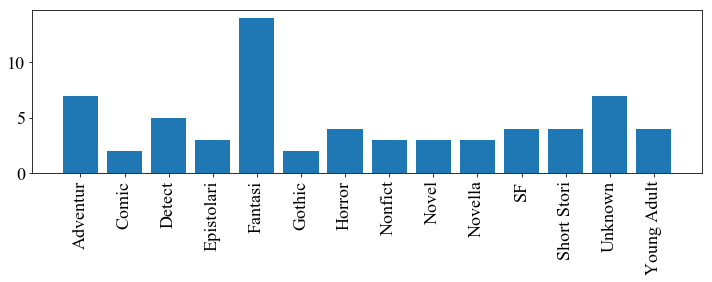

In [121]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = [
#     'Times New Roman', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'
# ]
# rcParams['font'] = font_path

rcParams['font.size'] = 18

prop = fm.FontProperties(fname=font_path)
# ax.set_title('This is some random font', fontproperties=prop, size=32)

# data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(12, 3))#, figsize=(9, 3), sharey=True)
axs.bar(names, values)
plt.xticks(rotation=90)
plt.fontproperties = prop
plt.savefig('../plot/correct_labels.png')
# fig.suptitle('Categorical Plotting')